In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Satellite_cleaned.xlsx')

In [3]:
df.head()

,Unnamed: 0,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.)
0,0,Earth Observation,LEO,Non-Polar Inclined,0,566,576,0.001510,22.0,22.0,22.0,0.5
1,2,Technology Development,LEO,Sun-Synchronous,0,497,517,0.001450,4.5,4.5,4.5,2.0
2,35,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
3,36,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
4,43,Earth Observation,LEO,Sun-Synchronous,0,544,552,0.000578,215.0,215.0,215.0,2.0


In [4]:
df = df[['Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)']]

In [5]:
df.head()

,Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.)
0,Earth Observation,LEO,Non-Polar Inclined,0,566,576,0.001510,22.0,22.0,22.0,0.5
1,Technology Development,LEO,Sun-Synchronous,0,497,517,0.001450,4.5,4.5,4.5,2.0
2,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
3,Technology Development,LEO,Sun-Synchronous,0,614,700,0.006119,5.0,5.0,5.0,3.0
4,Earth Observation,LEO,Sun-Synchronous,0,544,552,0.000578,215.0,215.0,215.0,2.0


In [ ]:
# @title Purpose by Class of Orbit

df.groupby(['Class of Orbit', 'Purpose']).size().unstack().plot(kind='bar', stacked=True)

In [ ]:
# @title Expected Lifetime by Purpose

df.groupby('Purpose')['Expected Lifetime (yrs.)'].mean().plot(kind='bar', color=['darkorange', 'forestgreen', 'royalblue'])

In [ ]:
# @title Perigee (km)

from matplotlib import pyplot as plt
df['Perigee (km)'].plot(kind='hist', bins=20, title='Perigee (km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [8]:
df.columns

Index(['Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)'],
      dtype='object')

Scaling and oneHot encoding

In [9]:
r_scaler = RobustScaler()

In [10]:
encoder = OneHotEncoder(sparse_output=False, drop = 'first')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[['Purpose', 'Class of Orbit', 'Type of Orbit']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Purpose', 'Class of Orbit', 'Type of Orbit']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
data = df_encoded.drop(['Purpose', 'Class of Orbit', 'Type of Orbit'], axis=1)

In [11]:
data.head()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),Purpose_Earth Observation,Purpose_Earth Observation,...,Purpose_Technology Development,Class of Orbit_LEO,Class of Orbit_MEO,Type of Orbit_Deep Highly Eccentric,Type of Orbit_Elliptical,Type of Orbit_Equatorial,Type of Orbit_Molniya,Type of Orbit_Non-Polar Inclined,Type of Orbit_Polar,Type of Orbit_Sun-Synchronous
0,0,566,576,0.001510,22.0,22.0,22.0,0.5,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,497,517,0.001450,4.5,4.5,4.5,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,614,700,0.006119,5.0,5.0,5.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,614,700,0.006119,5.0,5.0,5.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,544,552,0.000578,215.0,215.0,215.0,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
data.columns

Index(['Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Expected Lifetime (yrs.)',
       'Purpose_Earth Observation', 'Purpose_Earth Observation ',
       'Purpose_Earth Science', 'Purpose_Meteorological', 'Purpose_Navigation',
       'Purpose_Space Observation', 'Purpose_Space Science',
       'Purpose_Technology Demonstration', 'Purpose_Technology Development',
       'Class of Orbit_LEO', 'Class of Orbit_MEO',
       'Type of Orbit_Deep Highly Eccentric', 'Type of Orbit_Elliptical',
       'Type of Orbit_Equatorial', 'Type of Orbit_Molniya',
       'Type of Orbit_Non-Polar Inclined', 'Type of Orbit_Polar',
       'Type of Orbit_Sun-Synchronous'],
      dtype='object')

In [13]:
data.shape

(4911, 26)

In [14]:
X = data.drop('Expected Lifetime (yrs.)', axis = 1)
y = data[['Expected Lifetime (yrs.)']]

In [15]:
X.columns, X.shape

(Index(['Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
        'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
        'Launch Mass (kg.)', 'Purpose_Earth Observation',
        'Purpose_Earth Observation ', 'Purpose_Earth Science',
        'Purpose_Meteorological', 'Purpose_Navigation',
        'Purpose_Space Observation', 'Purpose_Space Science',
        'Purpose_Technology Demonstration', 'Purpose_Technology Development',
        'Class of Orbit_LEO', 'Class of Orbit_MEO',
        'Type of Orbit_Deep Highly Eccentric', 'Type of Orbit_Elliptical',
        'Type of Orbit_Equatorial', 'Type of Orbit_Molniya',
        'Type of Orbit_Non-Polar Inclined', 'Type of Orbit_Polar',
        'Type of Orbit_Sun-Synchronous'],
       dtype='object'),
 (4911, 25))

In [16]:
X = pd.DataFrame(r_scaler.fit_transform(X), columns = ['Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Purpose_Earth Observation',
       'Purpose_Earth Observation ', 'Purpose_Earth Science',
       'Purpose_Meteorological', 'Purpose_Navigation',
       'Purpose_Space Observation', 'Purpose_Space Science',
       'Purpose_Technology Demonstration', 'Purpose_Technology Development',
       'Class of Orbit_LEO', 'Class of Orbit_MEO',
       'Type of Orbit_Deep Highly Eccentric', 'Type of Orbit_Elliptical',
       'Type of Orbit_Equatorial', 'Type of Orbit_Molniya',
       'Type of Orbit_Non-Polar Inclined', 'Type of Orbit_Polar',
       'Type of Orbit_Sun-Synchronous'])
X

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Purpose_Earth Observation,Purpose_Earth Observation,Purpose_Earth Science,...,Purpose_Technology Development,Class of Orbit_LEO,Class of Orbit_MEO,Type of Orbit_Deep Highly Eccentric,Type of Orbit_Elliptical,Type of Orbit_Equatorial,Type of Orbit_Molniya,Type of Orbit_Non-Polar Inclined,Type of Orbit_Polar,Type of Orbit_Sun-Synchronous
0,0.0,0.339623,0.365854,1.713167,-238.000000,-238.000000,-238.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.962264,-1.073171,1.632081,-255.500000,-255.500000,-255.500000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
2,0.0,1.245283,3.390244,7.942271,-255.000000,-255.000000,-255.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
3,0.0,1.245283,3.390244,7.942271,-255.000000,-255.000000,-255.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4,0.0,-0.075472,-0.219512,0.453903,-45.000000,-45.000000,-45.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,0.0,0.132075,1.097561,4.630645,544.518158,544.518158,544.518158,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4907,0.0,-1.132075,-1.268293,1.738464,470.000000,470.000000,470.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4908,0.0,3.773585,4.804878,0.621143,2390.000000,2390.000000,2390.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4909,0.0,-0.905660,-1.390244,0.065818,2390.000000,2390.000000,2390.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0


In [ ]:
# Exploratory Data Analysis
sns.pairplot(data)
plt.show()

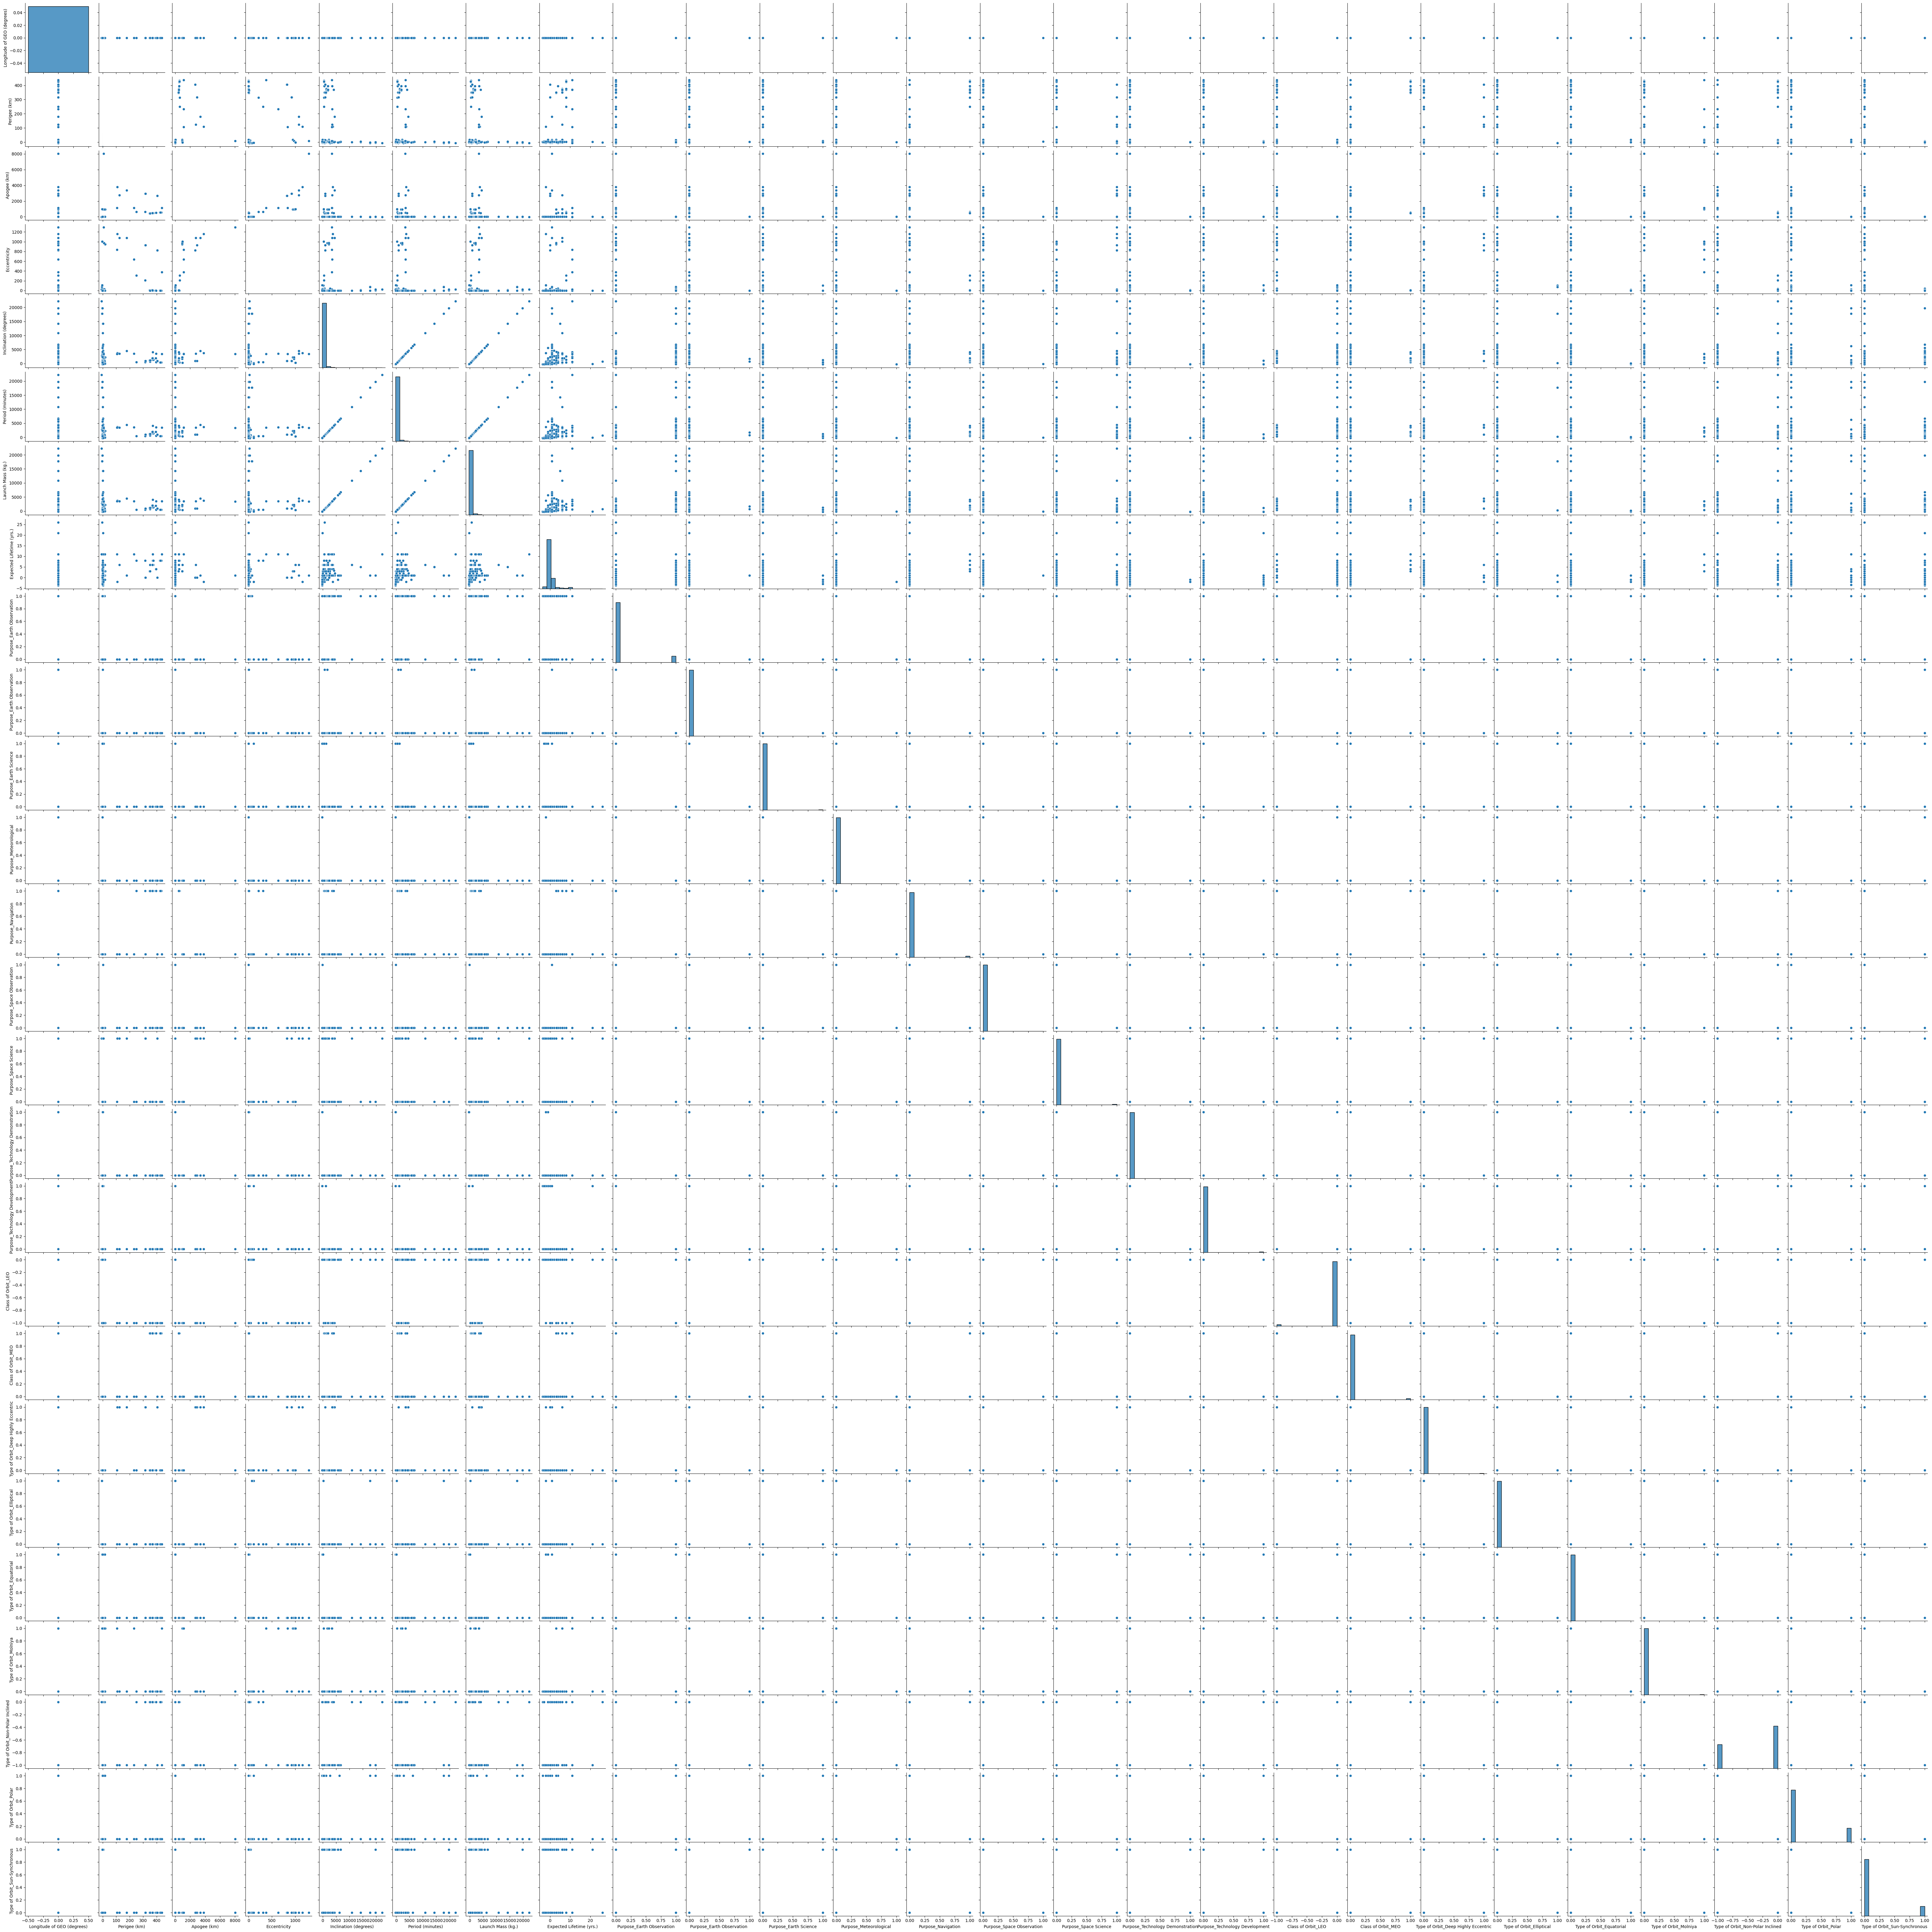

In [ ]:
sns.pairplot(X)
plt.show()

In [ ]:
X.head()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Purpose_Earth Observation,Purpose_Earth Observation,Purpose_Earth Science,...,Purpose_Technology Development,Class of Orbit_LEO,Class of Orbit_MEO,Type of Orbit_Deep Highly Eccentric,Type of Orbit_Elliptical,Type of Orbit_Equatorial,Type of Orbit_Molniya,Type of Orbit_Non-Polar Inclined,Type of Orbit_Polar,Type of Orbit_Sun-Synchronous
0,0.0,0.339623,0.365854,1.713167,-238.0,-238.0,-238.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.962264,-1.073171,1.632081,-255.5,-255.5,-255.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
2,0.0,1.245283,3.390244,7.942271,-255.0,-255.0,-255.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
3,0.0,1.245283,3.390244,7.942271,-255.0,-255.0,-255.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4,0.0,-0.075472,-0.219512,0.453903,-45.0,-45.0,-45.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_lin = lin_reg.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred_lin)), r2_score(y_test, y_pred_lin)

(1397.2916052089033, -400409.3462030754)

In [21]:
results = pd.DataFrame({'Models': [], 'RMSE': [], 'R2': []})

In [22]:
results.loc[0] = ['Linear Regression', np.sqrt(mean_squared_error(y_test, y_pred_lin)), r2_score(y_test, y_pred_lin)]

In [23]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred_poly)), r2_score(y_test, y_pred_poly)

(4609286.858740442, -4357111416313.009)

In [25]:
results.loc[1] = ['Polynomial Regression (degree = 2)', np.sqrt(mean_squared_error(y_test, y_pred_poly)), r2_score(y_test, y_pred_poly)]

In [ ]:
# Polynomial Regression
poly_features_t = PolynomialFeatures(degree=3, include_bias=False)
X_poly_t = poly_features_t.fit_transform(X_train)
poly_reg_t = LinearRegression()
poly_reg_t.fit(X_poly_t, y_train)

X_test_poly_t = poly_features_t.transform(X_test)
y_pred_poly_t = poly_reg_t.predict(X_test_poly_t)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_poly_t)), r2_score(y_test, y_pred_poly_t)

(178200515.30723742, -6512520480716042.0)

In [ ]:
results.loc[2] = ['Polynomial Regression (degree = 3)', np.sqrt(mean_squared_error(y_test, y_pred_poly_t)), r2_score(y_test, y_pred_poly_t)]

In [26]:
# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 50, random_state = 42)

RF_model.fit(X_train, np.ravel(y_train))

RandomForestRegressor(n_estimators=50, random_state=42)

In [27]:
y_pred_rf = RF_model.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred_rf)), r2_score(y_test, y_pred_rf)

(0.9336018754541333, 0.821246472080225)

In [ ]:
results.loc[3] = ['Random Forest', np.sqrt(mean_squared_error(y_test, y_pred_rf)), r2_score(y_test, y_pred_rf)]

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Support Vector Machine Regression
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_svm = svm_regressor.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)

(1.588035243928852, 0.48280839801126907)

In [ ]:
results.loc[4] = ['SVM', np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)]

In [ ]:
# KNN regression
knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred_knn = knn_regressor.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)

(1.1466355202402827, 0.7303614560834119)

In [ ]:
results.loc[5] = ['KNN', np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)]

Elbow Plot

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 21)}

knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring=make_scorer(mean_squared_error))
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring=make_scorer(mean_squared_error))

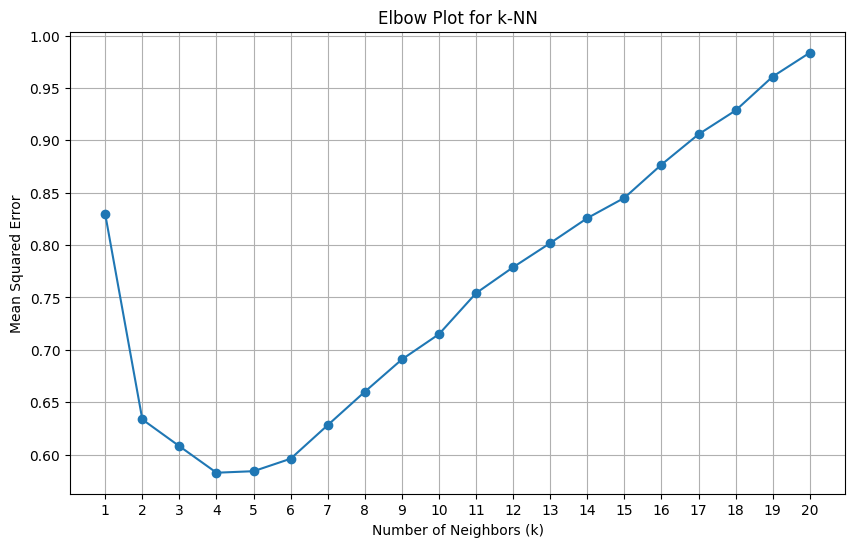

In [ ]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
param_values = param_grid['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o')
plt.title('Elbow Plot for k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.xticks(param_values)
plt.grid(True)
plt.show()

In [ ]:
results

,Models,RMSE,R2
0,Linear Regression,1.397292e+03,-4.004093e+05
1,Polynomial Regression (degree = 2),4.609287e+06,-4.357111e+12
2,Polynomial Regression (degree = 3),1.782005e+08,-6.512520e+15
3,Random Forest,9.336019e-01,8.212465e-01
4,SVM,1.588035e+00,4.828084e-01
5,KNN,1.146636e+00,7.303615e-01


Prediction

In [29]:
def predict_random():
  X_pred = X_train.sample(1)
  pred = RF_model.predict(X_pred)
  a = encoder.inverse_transform(X_pred[['Purpose_Earth Observation',
       'Purpose_Earth Observation ', 'Purpose_Earth Science',
       'Purpose_Meteorological', 'Purpose_Navigation',
       'Purpose_Space Observation', 'Purpose_Space Science',
       'Purpose_Technology Demonstration', 'Purpose_Technology Development',
       'Class of Orbit_LEO', 'Class of Orbit_MEO',
       'Type of Orbit_Deep Highly Eccentric', 'Type of Orbit_Elliptical',
       'Type of Orbit_Equatorial', 'Type of Orbit_Molniya',
       'Type of Orbit_Non-Polar Inclined', 'Type of Orbit_Polar',
       'Type of Orbit_Sun-Synchronous']])
  b = r_scaler.inverse_transform(X_pred)
  X_pred[['Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)']] = b[0][:7]
  X_pred = X_pred.drop(['Purpose_Earth Observation', 'Purpose_Earth Observation ',
       'Purpose_Earth Science', 'Purpose_Meteorological', 'Purpose_Navigation',
       'Purpose_Space Observation', 'Purpose_Space Science',
       'Purpose_Technology Demonstration', 'Purpose_Technology Development',
       'Class of Orbit_LEO', 'Class of Orbit_MEO',
       'Type of Orbit_Deep Highly Eccentric', 'Type of Orbit_Elliptical',
       'Type of Orbit_Equatorial', 'Type of Orbit_Molniya',
       'Type of Orbit_Non-Polar Inclined', 'Type of Orbit_Polar',
       'Type of Orbit_Sun-Synchronous'], axis=1)
  X_pred['Purpose'] = a[0][0]
  X_pred['Class of Orbit'] = a[0][1]
  X_pred['Type of Orbit'] = a[0][2]
  print('Input: \n', X_pred.iloc[0, :])
  print('Prediction:', pred[0], 'Yrs')

In [30]:
predict_random()

Input: 
 Longitude of GEO (degrees)                  0.0
Perigee (km)                              612.0
Apogee (km)                               636.0
Eccentricity                           0.001716
Inclination (degrees)                     185.0
Period (minutes)                          185.0
Launch Mass (kg.)                         185.0
Purpose                       Earth Observation
Class of Orbit                       Elliptical
Type of Orbit                          Cislunar
Name: 574, dtype: object
Prediction: 5.78 Yrs
